# INF552 Assignment2 Regression
### Tong Lyu 1076139647
## 1 Introduction
### 1.1 Libraries

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.ticker import MultipleLocator
%matplotlib inline

## 2. Exploratory data analysis
### 2.1 Basic Information
* Rows: The dataset contains contains 9568 rows.
* Cols: 4 independent variables and 1 dependent variable

    Dependent variable: the net hourly electrical energy output (EP).

|Independent variables|Abbreviations
| :------: | :------: |
|Hourly average ambient variables Temperature|T
|Ambient Pressure|AP
|Relative Humidity|RH
|Exhaust Vacuum|V

### 2.2 Make scatterplots

    As we can seen in the figure below, the correlation among independent variablea are very low, which means they are suitable to do regression analysis. In addition, the the tamperate and ambient pressure have a negative correlation with energy output. However, the other two variables have a low correlation with enery output. What's more, the scatter shows there are several outliers in the data.

<Figure size 288x288 with 0 Axes>

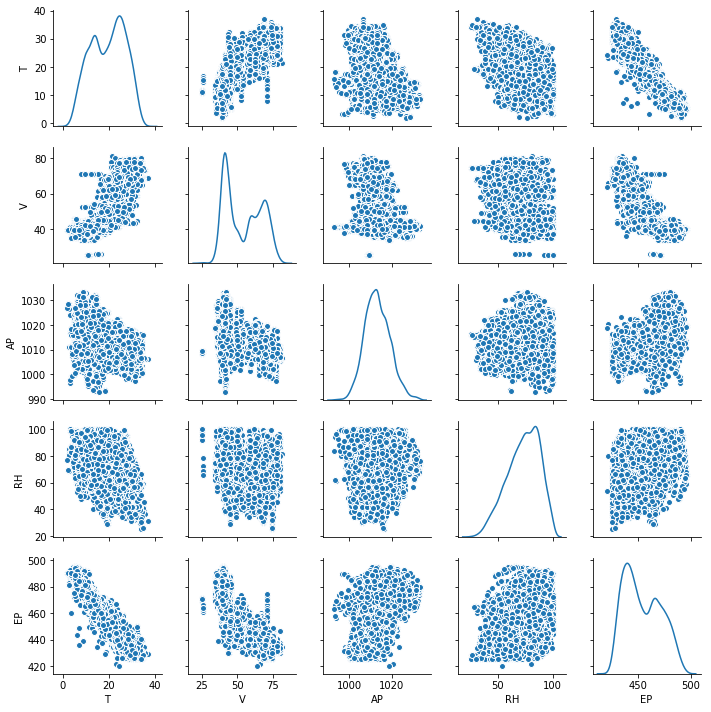

In [2]:
columns = ["T","V","AP","RH","EP"]
data = pd.read_excel("./data/Folds5x2_pp.xlsx",sheet_name = 0, sep=" ",header=0, names=columns)
plt.figure(figsize=(4,4))
sns.pairplot(data,size=2, diag_kind='kde')
plt.show()

### 2.3 Descriptive statistics

In [3]:
print(data.describe())
print(data.max() - data.min())
print(data.quantile(0.75) - data.quantile(0.25))

                 T            V           AP           RH           EP
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000
T     35.30
V     56.20
AP    40.41
RH    74.60
EP    75.50
dtype: float64
T     12.2100
V     24.8000
AP     8.1600
RH    21.5025
EP    28.6800
dtype: float64


#### Summarized table
|Statistics|T|V|AP|RH|EP
| :------: | :------: |:------: |:------: |:------: | :------: |
|Mean|19.65|54.31|1013.26|73.31|454.36
|Median|20.35|52.08|1012.94|74.98|451.55
|Range| 35.30| 56.20|40.41|74.60|75.50
|First quantile|13.51|41.74|1009.10|63.33|439.75
|Third quantile|25.72|66.54|1017.26|84.83|468.43
|Interquartile ranges|12.21|24.80|8.16|21.50|28.68

## 3. Simple linear regression (c)

****************************************************************************
The summary for simple linear regression model with variable T
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

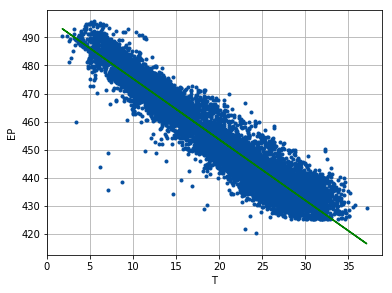

****************************************************************************
The summary for simple linear regression model with variable V
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:49   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

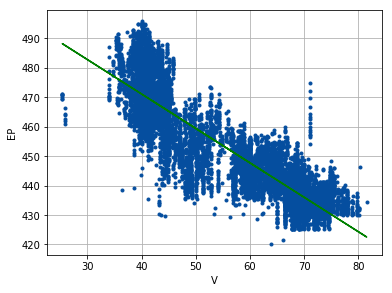

****************************************************************************
The summary for simple linear regression model with variable AP
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:49   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

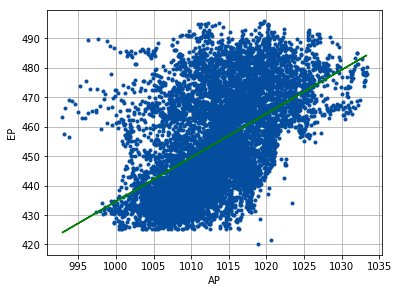

****************************************************************************
The summary for simple linear regression model with variable RH
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:49   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

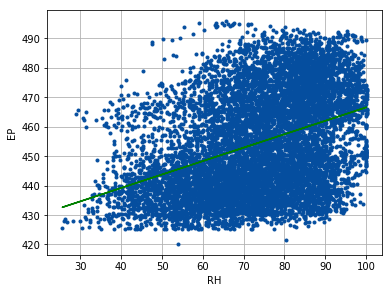

In [4]:
def singleRegression(data, variable, coef_simple):
    model = sm.OLS(data["EP"],sm.add_constant(data[variable]))
    predictions = model.fit()
    predict_y = predictions.fittedvalues
    coef_simple.append(predictions.params[1]);
    predict_summary = predictions.summary()
    print("****************************************************************************")
    print("The summary for simple linear regression model with variable " + variable)
    print(predict_summary)
    return predict_y
    
attrs = ["T","V","AP","RH"]
coef_simple = []
for attr in attrs:
    predict_y = singleRegression(data, attr, coef_simple)
    plt.figure(figsize=(6,4.5))
    plt.xlabel(attr)
    plt.ylabel("EP")
    plt.grid(True)
    plt.plot(data[attr],data["EP"],'r.',color="#054E9F")
    plt.plot(data[attr],predict_y,'g-')
    plt.show()

#### Summary 
From the summary for each mode, we can find that the p-value for each model is 0, which means all these predictors are statistically signiﬁcant associated with dependent variable.

## 4. Multiple regression model (d)

In [5]:
model = sm.OLS(data["EP"],sm.add_constant(data[attrs]))
predictions = model.fit()
print(predictions.summary())
coef_multi = predictions.params[1:]

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:49   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### Summary
Since all p-values are 0, we can reject all null hypothesis of the variables.
## 5. Compare regression coeﬃcients (e)

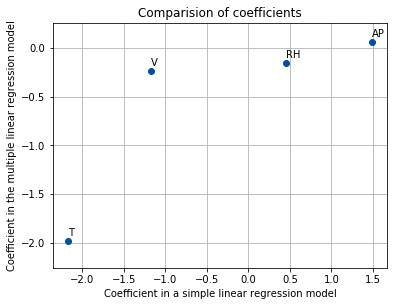

In [6]:
plt.figure(figsize=(6,4.5))
plt.title("Comparision of coefficients")
plt.xlabel("Coeﬃcient in a simple linear regression model")
plt.ylabel("Coeﬃcient in the multiple linear regression model")
plt.ylim(-2.25,0.25)
for i in range(0,4):
    plt.annotate(attrs[i], (coef_simple[i], coef_multi[i] + 0.05))
plt.grid(True)
plt.plot(coef_simple,coef_multi,'o',color="#054E9F")
plt.show()

## 6. Polynomial regression (f)

In [7]:
def polyregreesion(data, attr):
    model = smf.ols(formula='EP ~ %s + I(%s** 2) + I(%s** 3)' % (attr, attr, attr), data=data).fit()
    print("****************************************************************************")
    print("The summary for polynomial linear regression model with variable " + attr)
    print(model.summary())

for attr in attrs:
    polyregreesion(data, attr)

****************************************************************************
The summary for polynomial linear regression model with variable T
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:49   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

#### Summary
From above, we can find that p-values of each term are zero, which means each variable is statistically significant in polynomial regression.
## 7. Full linear regression model (g)

In [8]:
model = smf.ols(formula='EP ~ T + V + AP + RH + T * V + T * AP + T * RH + V * AP + V * RH + AP * RH', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:49   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

#### Summary
The p-values of three pairs are extremely small: T & V, T & RH, V & AP, which means these pairs have association of interactions.
## 8. Improve models (h)

In [9]:
train_data, test_data = train_test_split(data, test_size=0.3)
multi_model = smf.ols(formula='EP ~ T + V + AP + RH', data=train_data).fit()
train_multi_pred = multi_model.predict(train_data)
test_multi_pred = multi_model.predict(test_data)

full_model = smf.ols(formula='EP ~ T + V + AP + RH + T * V + T * AP + T * RH + V * AP + V * RH + AP * RH + \
              I(T**2) + I(V**2) + I(AP**2) + I(RH**2)', data=train_data).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7228.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:21:49   Log-Likelihood:                -19195.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6682   BIC:                         3.852e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8294.1930   1473.209     -5.630      0.0

In [10]:
# From the table above, we want move T:AP,V:AP,V:RH,V^2
revise_full_model = smf.ols(formula='EP ~ T + V + AP + RH + T * V + T * RH + AP * RH + \
              I(T**2) + I(AP**2) + I(RH**2)', data=train_data).fit()

train_full_pred = revise_full_model.predict(train_data)
test_full_pred = revise_full_model.predict(test_data)

print("MSE of Linear multiple variable model")
print("Train data : %.2f" % mean_squared_error(train_data["EP"], train_multi_pred))
print("Test data: %.2f \n" % mean_squared_error(test_data["EP"], test_multi_pred))
print("MSE of revised full model")
print("Train data : %.2f" % mean_squared_error(train_data["EP"], train_full_pred))
print("Test data: %.2f" % mean_squared_error(test_data["EP"], test_full_pred))

MSE of Linear multiple variable model
Train data : 20.80
Test data: 20.72 

MSE of revised full model
Train data : 18.12
Test data: 18.23


#### Summary
The MSEs of linear multiple regression model are higher than those of full mode.

## 9. KNN Regression (i)

K-Nearest Neighbor Regression for Raw Features:


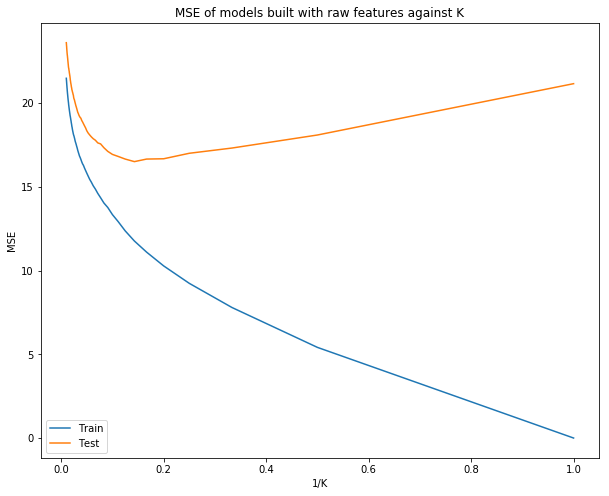

The optimal number of neighbors(k) is 7
The corresponding MSE (k=7) is 16.51


In [11]:
def knn_k(data,attrs):
    train_err = []
    test_err = []
    nei = np.arange(1,101)
    X_train, X_test, Y_train, Y_test = train_test_split(data[attrs], data["EP"], test_size=0.3)
    
    for k in nei:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, Y_train)
        train_pred = knn.predict(X_train)
        test_pred = knn.predict(X_test)
        train_err.append(mean_squared_error(Y_train, train_pred))
        test_err.append(mean_squared_error(Y_test, test_pred))
    opt_k = nei[test_err.index(min(test_err))]
    return train_err, test_err, opt_k

print("K-Nearest Neighbor Regression for Raw Features:")
train_err_raw, test_err_raw, opt_k_raw = knn_k(data, attrs)
x_axis = []
for i in range(1,101) :
    x_axis.append(1/i)
plt.figure(figsize=(10,8))
plt.title("MSE of models built with raw features against K")
plt.plot(x_axis, train_err_raw, label='Train')
plt.plot(x_axis, test_err_raw, label='Test')
plt.legend(loc='lower left')
plt.xlabel('1/K')
plt.ylabel('MSE')
plt.show()
print("The optimal number of neighbors(k) is %d" %opt_k_raw)
print("The corresponding MSE (k=%d) is %.2f" %(opt_k_raw, min(test_err_raw)))

K-Nearest Neighbor Regression for Normalized Features:


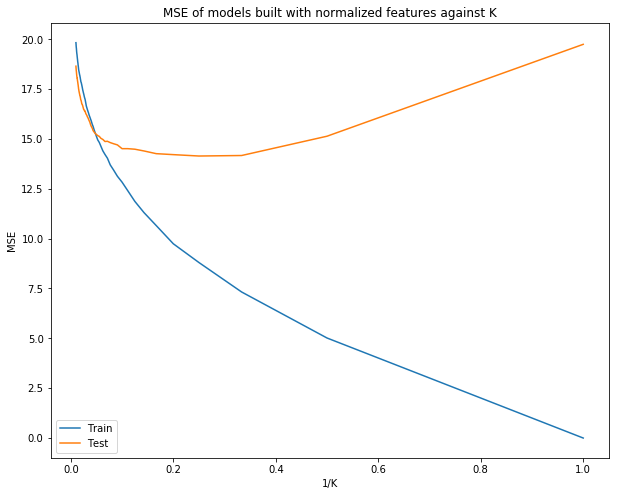

The optimal number of neighbors(k) is 4
The corresponding MSE (k=4) is 14.14


In [12]:
nor_data = ((data-data.mean())/data.std()).drop(['EP'], axis=1)
nor_data["EP"] = data["EP"]
print("K-Nearest Neighbor Regression for Normalized Features:")
train_err_nor, test_err_nor, opt_k_nor = knn_k(nor_data, attrs)
plt.figure(figsize=(10,8))
plt.title("MSE of models built with normalized features against K")
plt.plot(x_axis, train_err_nor, label='Train')
plt.plot(x_axis, test_err_nor, label='Test')
plt.legend(loc='lower left')
plt.xlabel('1/K')
plt.ylabel('MSE')
plt.show()
print("The optimal number of neighbors(k) is %d" % opt_k_nor)
print("The corresponding MSE (k=%d) is %.2f" %(opt_k_nor, min(test_err_nor)))

## 10. Compare Linear regression and KNN regression (j)
|Models|MSE
| :------: | :------: |:------: |:------: |:------: | :------: |
|Linear multi-regression | 20.72
|Full regression (with pairs and quadratic nonlinearities)|18.23
|KNN with raw features | 16.51
|KNN with normalized features | 14.14

KNN's performance is better than that of linear regression. Since linear regression is more appropriate for the linear relationship between predictors and dependent variables, it does not fit other relationships. When we use KNN regression, we focus on the similarity of samples, which can better handle non-linear relationships.